In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv(r'C:\Cursos\Analise_de_dados\Case Empresa Unicórnio\Startups in 2021 end.csv')

In [56]:
data.rename(columns={
    'Unnamed: 0': 'id',
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($B)',
    'Date Joined': 'Data de Adesão',
    'Country': 'Pais',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores'
}, inplace=True)

In [57]:
# Startups Que Mais Aparecem (TOP 3)
for i in range(3):
    print(f"""TOP {i+1}
SETOR: {data['Setor'].value_counts().index[i]}
QTD: {data['Setor'].value_counts()[i]} ({round((data['Setor'].value_counts(normalize=True)[i]) * 100,2)}%)
    """)


TOP 1
SETOR: Fintech
QTD: 190 (20.3%)
    
TOP 2
SETOR: Internet software & services
QTD: 167 (17.84%)
    
TOP 3
SETOR: E-commerce & direct-to-consumer
QTD: 102 (10.9%)
    


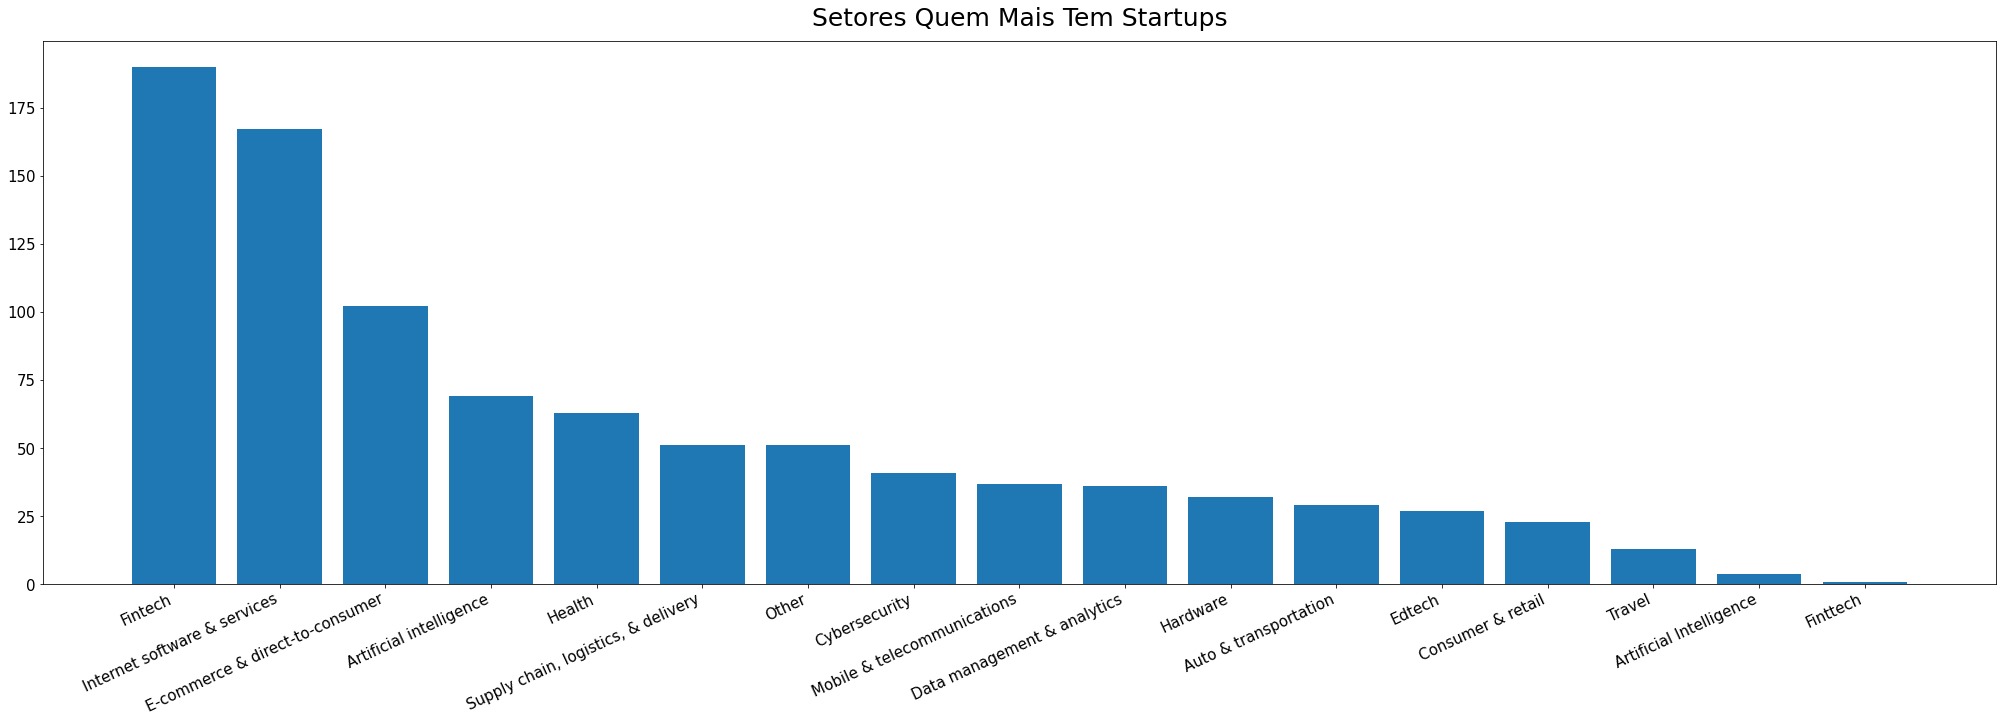

In [58]:
# Set Grafico Barras
plt.figure(figsize=(35,10))
plt.title('Setores Quem Mais Tem Startups', size=25, pad=15)
plt.xticks(rotation=25, ha='right', size=15)
plt.yticks(size=15)
plt.bar(data['Setor'].value_counts().index, data['Setor'].value_counts())
plt.show()

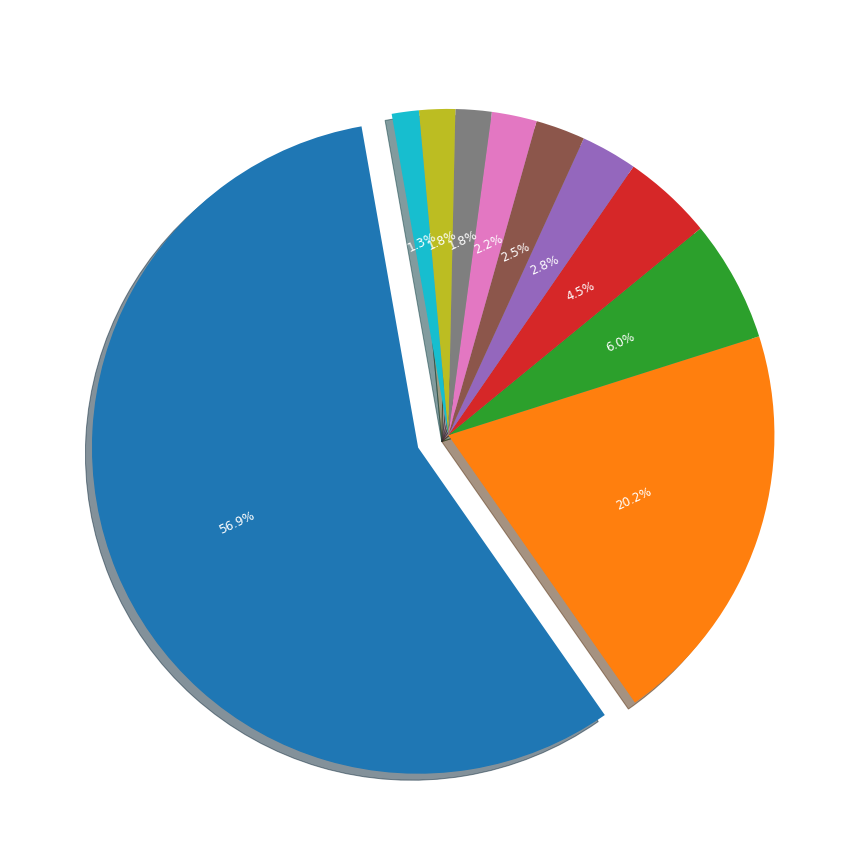

In [59]:
# Set Grafico dos Paises Geradores
analise = round((data['Pais'].value_counts(normalize=True)) * 100, 1)
plt.figure(figsize=(30, 15))
plt.title('Paises com Mais Unicornios', color= 'white', size=20)
plt.pie(
    analise.head(10),
    labels=analise.index[:10],
    shadow=True,
    startangle=100,
    autopct='%.1f%%',
    explode=(0.1,0,0,0,0,0,0,0,0,0),
    textprops={'color':'w','size': 12, 'rotation': 25})
plt.show()

In [60]:
data['Data de Adesão'] = pd.to_datetime(data['Data de Adesão'])

In [61]:
# Tabela Analitica
data['Ano'] = pd.DatetimeIndex(data['Data de Adesão']).year
data['Mes'] = pd.DatetimeIndex(data['Data de Adesão']).month
analise_agrupada = data.groupby(by=['Pais', 'Ano', 'Mes', 'Empresa', 'Valor ($B)']).count()['id'].reset_index()
analise_agrupada.loc[analise_agrupada['Pais'] == 'Brazil']

,Pais,Ano,Mes,Empresa,Valor ($B),id
12,Brazil,2018,3,Nubank,$30,1
13,Brazil,2018,7,Movile,$1,1
14,Brazil,2018,11,iFood,$1,1
15,Brazil,2019,6,Loggi,$2,1
16,Brazil,2019,9,QuintoAndar,$5.1,1
17,Brazil,2019,10,EBANX,$1,1
18,Brazil,2019,12,Wildlife Studios,$3,1
19,Brazil,2020,1,Loft,$2.9,1
20,Brazil,2020,12,C6 Bank,$5.05,1
21,Brazil,2020,12,Creditas,$1.75,1


In [62]:
data['Valor ($B)'] = pd.to_numeric(data['Valor ($B)'].apply(lambda line: line.replace('$', '')))

In [63]:
# Tabela Analitica (Valor Gerado Por Pais)
data.groupby(by=['Pais']).sum()['Valor ($B)'].reset_index()

,Pais,Valor ($B)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60
5,Brazil,61.05
6,Canada,37.73
7,Chile,1.50
8,China,569.48
9,Colombia,6.40


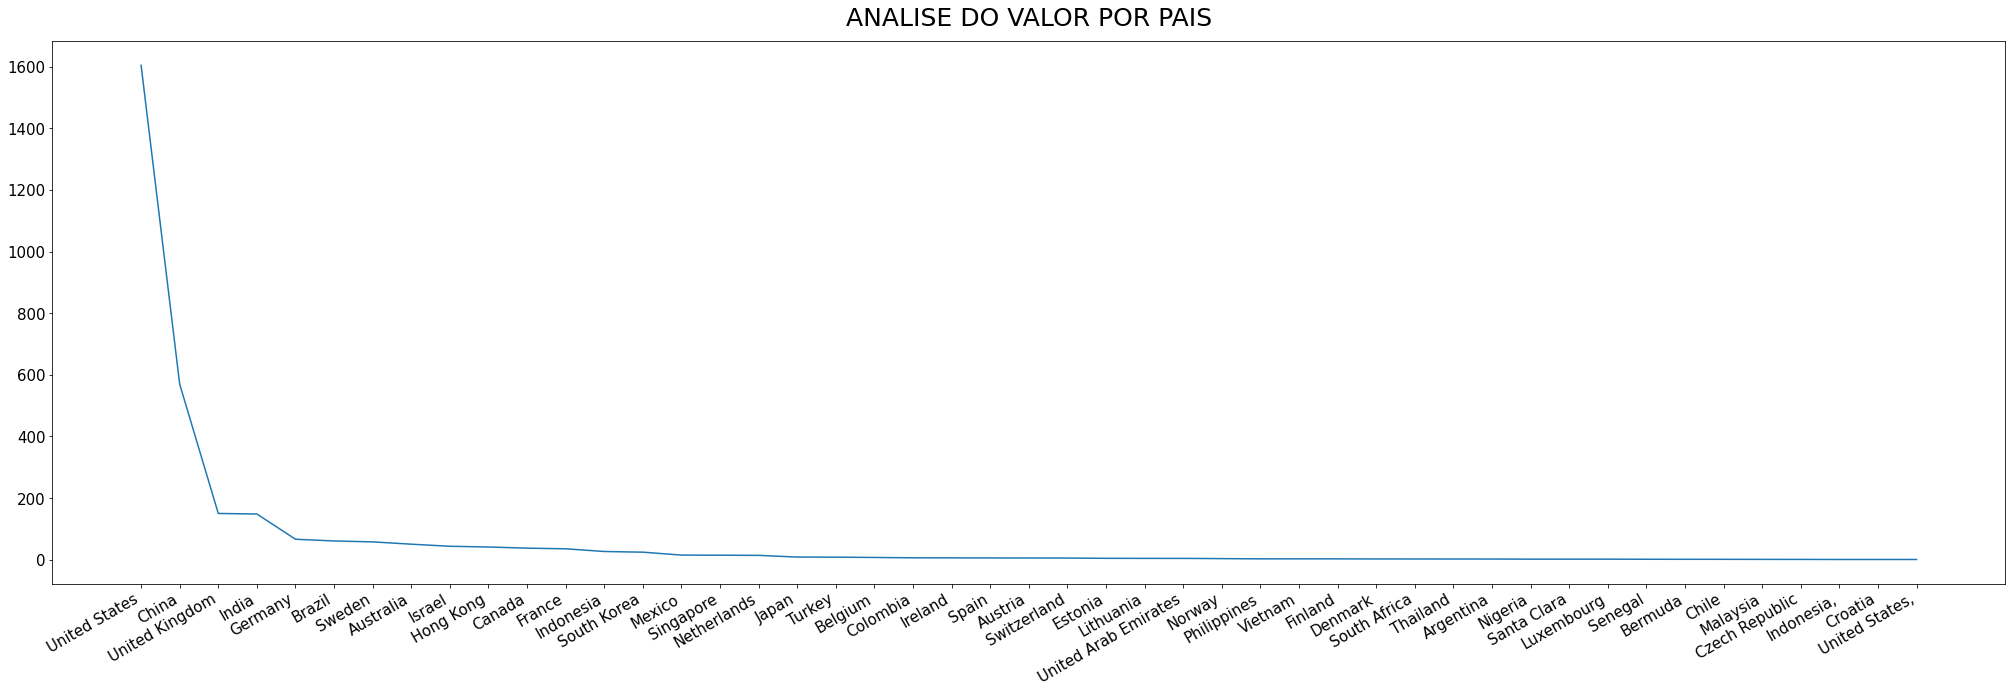

In [65]:
analise_valor = data.groupby(by=['Pais']).sum()['Valor ($B)'].reset_index().sort_values('Valor ($B)', ascending=False)
plt.figure(figsize=(35,10))
plt.title('ANALISE DO VALOR POR PAIS', size=25, pad=15)
plt.xticks(rotation=30, ha='right', size=15)
plt.yticks(size=15)
plt.plot(analise_valor['Pais'], analise_valor['Valor ($B)'])
plt.show()